# **Mechanical modeling**

Goals for today:
1. Recall 2 Newton's Law and Euler-Lagrange method
2. Recall ODEs and State space model
3. How to make simulations

## **Recall linear system representations**


### **Ordinary Differential Equations (ODE)**
The normal form of an $n$-th order differential equation is:
$$\mathbf{x}^{(n)}=\mathbf{f}(\mathbf{x}^{(n-1)},\mathbf{x}^{(n-2)},...,\ddot{\mathbf{x}},\dot{\mathbf{x}},\mathbf{x},t)$$
where $\mathbf{x} = \mathbf{x}(t)$ is the solution of the equation. It is a **dynamical system**.

The set $\{ \mathbf{x}, \ \dot{\mathbf{x}} \ ..., \ \mathbf{x}^{(n-1)} \}$ is called the **state** of the dynamical system.

In canonical form **linear ODE** as follows:
$$a_{n}z^{(n)} +a_{n-1}z^{(n-1)}+...+a_{2}\ddot z+a_{1}\dot z + a_0 z= b_0$$

### **State-space model**
**A state-space representation** is a mathematical model of a physical system as a set of input $\mathbf{u}$, output $\mathbf{y}$ and state variables $\mathbf{x}$ related by first-order differential equations (difference equations in discrete time).

State variables $\mathbf{x}$ are variables whose values evolve through time $t$ in a way that depends on the values they have at any given time and also depends on the externally imposed values of input variables $\mathbf{u}$. Output $\mathbf{y}$ depend on the values of the state variables $\mathbf{x}$.

In case if relationships between state, output and control is **linear**, we can formulate the model of system in following form:
\begin{equation}
\begin{cases}
\mathbf{\dot{x}} =\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\
\mathbf{y}=\mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}

where
*   $\mathbf{x} \in \mathbb{R}^n$ states of the system
*   $\mathbf{y} \in \mathbb{R}^l$ output vector
*   $\mathbf{u} \in \mathbb{R}^m$ control inputs
*   $\mathbf{A} \in \mathbb{R}^{n \times n}$ state matrix
*   $\mathbf{B} \in \mathbb{R}^{n \times m}$ input matrix
*   $\mathbf{C} \in \mathbb{R}^{l \times n}$ output matrix
*   $\mathbf{D} \in \mathbb{R}^{l \times m}$ feedforward matrix

## **Mechanical systems simulation**

In [ ]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint

### **Mass-spring-damper**

![msd](https://drive.google.com/uc?export=view&id=1z4Ap53xd25U6r9wMmYb-68zINO3wCyLQ)

Let's recall second Newton law:
$$
m\ddot{x}=\sum{F}
$$

ODE for this system is:

$$ m\ddot{x}=-b\dot{x}-kx$$

Let's recall Euler-Lagrange method for mechanics:
1. Select generalized coordinates $q_a$ to describe the degrees of freedom of a mechanical system. These coordinates are completely arbitrary. They need not be the original Cartesian coordinates associated with an inertial frame. Indeed, there is no need for the coordinates to even be attached to an inertial frame. The index $a=1,2,...$ labels each one of the generalized coordinates; there is one coordinate for each degree of freedom.
2. In terms of the generalized coordinates, calculate the system's total kinetic energy $T$ and total potential energy $V$. Then form what is known as the Lagrangian function of the system, which is denoted $L(q_a,\dot{q}_a)$; this depends on the generalized coordinates qa and the generalized velocities $\dot{q}_a=dq_a/dt$. The Lagrangian is defined by:
$$L = T-V$$
3. Substitute the Lagrangian into the Euler-Lagrange equations. This returns an equation of motion for each generalized coordinate $q_a(t)$. There is one Euler-Lagrange equation for each generalized coordinate.

$$
\frac{d}{dt}\frac{\partial L}{\partial \dot{q_a}} - \frac{\partial L}{\partial q_a} = 0
$$

4. The rest of the recipe is concerned with solving the equations of motion. The methods for doing this are varied, and they depend on the particular situation, just as they do in the Newtonian formulation.

Let's find mass-spring-damper dynamics according to Euler-Lagrange method. Due to the fact that our system have friction the method will have a little changing. First of all we will introduce Rayleigh dissipation function $G$. The Rayleigh dissipation function, named after Lord Rayleigh, is a function used to handle the effects of velocity-proportional frictional forces in Lagrangian mechanics. If the frictional force on a particle with velocity $\vec {v}$ can be written as ${\vec {F}}_{f}=\vec {b}\cdot {\vec {v}}$, the Rayleigh dissipation function can be defined as:
$$
G(v) = \frac{1}{2}(b_xv^2_x+b_yv^2_y+b_zv^2_z)
$$

As friction is not conservative, it is included in the term $Q = \frac{\partial G}{\partial \dot{q_a}}$ of Lagrange's equations:

$$
\frac{d}{dt}\frac{\partial L}{\partial \dot{q_a}} - \frac{\partial L}{\partial q_a} + \frac{\partial G}{\partial \dot{q_a}}= 0
$$

For mass-spring-damper system will be following functions:

$$
T = \frac{m\dot{x}^2}{2}; \quad
V = \frac{kx^2}{2};\quad \text{then} \quad
L = \frac{m\dot{x}^2}{2} - \frac{kx^2}{2}; \quad \text{and} \quad
G = \frac{b\dot{x}^2}{2}
$$

If we substitude this fuction into the Euler-Lagrange equation we will get the same result as with Newton method:

$$ m\ddot{x}=-b\dot{x}-kx$$

System dynamics in state space form:

$$\begin{bmatrix} \dot{x}\\ \ddot{x} \end{bmatrix} = \begin{bmatrix}
0 & 1 \\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix} \begin{bmatrix} x\\ \dot{x} \end{bmatrix}$$

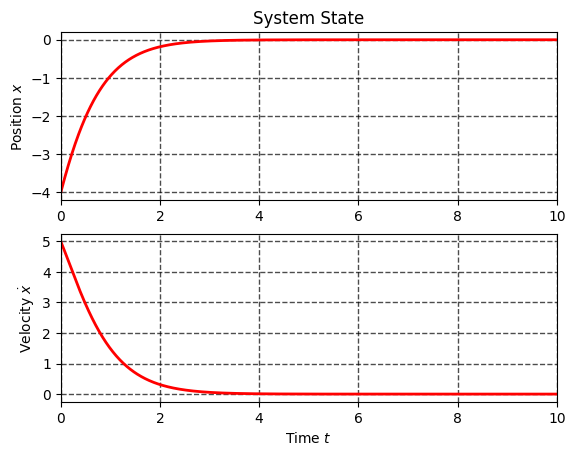

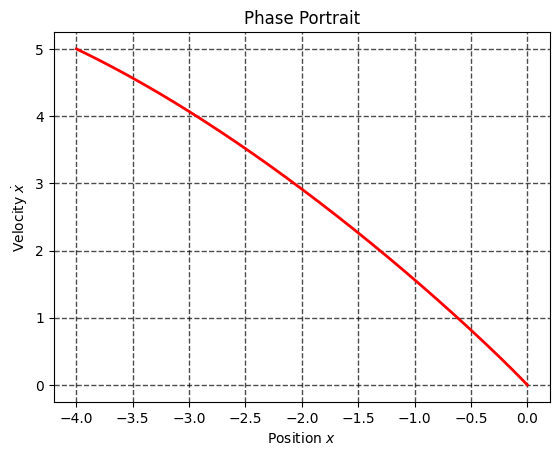

In [ ]:
#@markdown System parameters
m = 1 #@param {type:"slider", min:1, max:10, step:1}
k = 4 #@param {type:"slider", min:0, max:10, step:1}
b = 4 #@param {type:"slider", min:0, max:10, step:1}
A = np.array([[0, 1],
              [-k/m, -b/m]])

#@markdown Initial state
x_0 = -4 #@param {type:"slider", min:-10, max:10, step:1}
dx_0 = 5 #@param {type:"slider", min:-10, max:10, step:1}
x_init_state = np.array([x_0,
                         dx_0])  # initial state

#@markdown Simulation time
t_0 = 0
t_f = 10 #@param {type:"slider", min:1, max:10, step:1}
t = np.linspace(t_0, t_f, 1000)

def StateSpace(x, t, A): return np.dot(A, x)
solution = odeint(StateSpace, x_init_state, t, args=(A,))


subplot(2,1,1)
title("System State")
plot(t, solution[:,0], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t_0, t_f])
ylabel(r'Position ${x}$')

subplot(2,1,2)
plot(t, solution[:,1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t_0, t_f])
ylabel(r'Velocity ${\dot{x}}$')
xlabel(r'Time $t$')
show()

title("Phase Portrait")
plot(solution[:,0], solution[:,1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Position ${x}$')
ylabel(r'Velocity ${\dot{x}}$')
show()

### **Criticaly damped system**

Let's return to the original ODE for this system:

$$ m\ddot{x}=-b\dot{x}-kx$$

Substituting the species $x = e^{\lambda t}$ will lead this equation to the characteristic equation:

$$
\lambda^2 + \frac{b}{m}\lambda + \frac{k}{m} = 0
$$

The characteristic equation has a quadratic form, so it can be represented in the form:

$$
\lambda^2 + 2\zeta\omega_0\lambda + \omega_0^2 = 0
$$

when $\omega_0$ is natural frequency and $\zeta$ is critical damping coefficient, so:

$$
\begin{align}
\omega_0 = \sqrt{\frac{k}{m}}  &&&&
\zeta = \frac{b}{2 m \omega_0} = \frac{b}{2\sqrt{km}}\\
\end{align}
$$

This substitution allows us to look at the system in terms of the $\zeta$ characteristic. The roots of the characteristic equation are:

$$
\lambda_\pm = \omega_0\left(-\zeta \pm \sqrt{\zeta^2-1}\right)
$$

Depending on the dimensionality of the coefficient $\zeta$, the roots of the characteristic equation can become both real and complex numbers.

**Undamped system:** if $\zeta = 0$. Then the roots is: $\lambda_\pm = \pm\omega_0i$

Then solution will be following $x = c_1e^{iwt} + c_2e^{-iwt}$. According to the [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula) and  [method for solving linear differential equations with constant coefficients](http://hm.tpu.ru/AVTF/textbook1/11.pdf) the solution for such system will be following:

$$
x = C_1\cos{\omega_0 t} + C_2\cos{\omega_0 t}
$$

This case is extremely rare in the natural world with the closest examples being cases where friction was purposefully reduced to minimal values.

**Underdamped system:** if $0 < \zeta < 1$. Then the roots is: $\lambda_\pm = -\omega_0\zeta\pm i\omega_0\sqrt{1-\zeta^2}$. The solution for this system is:

$$
x = e^{-\zeta\omega_0t} \left( C_1\cos{\omega_d t} + C_2\cos{\omega_d t} \right)
$$
when $\omega_d = \omega_0\sqrt{1-\zeta^2}$ is the natural frequency of the damped oscillations.

**Overdamped system:** when $\zeta > 1$. Then the roots is: $\lambda_\pm = -\omega_0\zeta\pm \omega_0\sqrt{\zeta^2-1}$. The system will behave as follows:

$$
x = C_1e^{\lambda_-}+C_2e^{\lambda_+}
$$

Situations where overdamping is practical tend to have tragic outcomes if overshooting occurs, usually electrical rather than mechanical. For example, landing a plane in autopilot: if the system overshoots and releases landing gear too late, the outcome would be a disaster.

**Critically damped systems:** when $\zeta = 1$. Then the roots is: $\lambda_\pm = -\omega_0$. Equation describing the state of the system in this case:

$$
x = (C_1t + C_2)e^{-\omega_0t}
$$

This is the border between the overdamped and underdamped cases, and is referred to as critically damped. This turns out to be a desirable outcome in many cases where engineering design of a damped oscillator is required (e.g., a door closing mechanism).

Zeta = 0 b = 0.0
Zeta = 0.5 b = 2.0
Zeta = 1 b = 4.0
Zeta = 1.5 b = 6.0


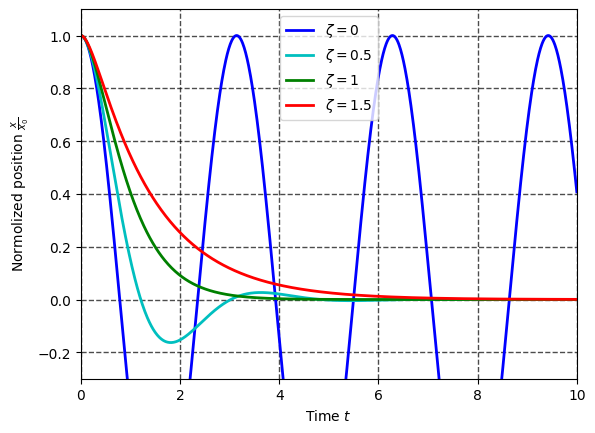

In [ ]:
#@markdown System parameters
m = 1
k = 4
zeta_undamped = 0
zeta_underdamped = 0.5 #@param {type:"slider", min:0.1, max:0.9, step:0.1}
zeta_cd = 1
zeta_overdamped = 1.5 #@param {type:"slider", min:1.1, max:1.9, step:0.1}
zetas = [zeta_undamped, zeta_underdamped, zeta_cd, zeta_overdamped]
zeta_colors = ['b', 'c', 'g', 'r']

#@markdown Initial state
x_0 = -5 #@param {type:"slider", min:-10, max:10, step:1}
dx_0 = 0 #@param {type:"slider", min:-10, max:10, step:1}
x_init_state = np.array([x_0,
                         dx_0])  # initial state

#@markdown Simulation time
t_0 = 0
t_f = 10 #@param {type:"slider", min:1, max:10, step:1}
t = np.linspace(t_0, t_f, 1000)

def b_calculation(m, k, zeta): return zeta*(2*np.sqrt(m*k))
def A_matrix(m, k, b): return np.array([[0, 1], [-k/m, -b/m]])
def StateSpace(x, t, A): return np.dot(A, x)

for i, zeta in enumerate(zetas):
  b = b_calculation(m, k, zeta)
  print('Zeta =', zeta, 'b =', b)
  A = A_matrix(m, k, b)
  solution = odeint(StateSpace, x_init_state, t, args=(A,))
  label = r'$\zeta = $'+str(zeta)
  plot(t, solution[:,0]/x_0, linewidth=2.0, color=zeta_colors[i], label=label)

grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlabel(r'Time $t$')
ylabel(r'Normolized position $\frac{x}{x_0}$')
xlim([t_0, t_f])
ylim([-0.3, 1.1])
legend()
show()

### **Double mass problem**

![msd](https://drive.google.com/uc?export=view&id=1q3B7n_eBlMfke2IY5O9qvSRQBmdSUvh4)



> **Tasks**
>
> 1. Write the equation of motion of the system according to Newton's second law of motion and according to Euler Lagrange method
> 2. Bring the system into a state space model
> 3. Simulate the system for different values of $m_1$, $m_2$, $k_1$, $k_2$ and $k_3$
> 4. Draw a graph of the system state vs. time and a phase portrait of the system
> 5. Simulate system with $m_1=m_2$ and $k_1=k_2=k_3$. What the differents in behaviour with system with different values.
> 5. Repeat steps for system with viscosy friction $b$ between mass and floor. Take $m_1=m_2$ and $k_1=k_2=k_3$. What is the differents in behaviour with system without friction.

# Double Mass-Spring-Damper System

## Equations of Motion

The equations of motion for the double mass-spring-damper system, using Newton's second law:
$$
m_1 \ddot{x}_1 = -k_1 x_1 - b \dot{x}_1 + k_2 (x_2 - x_1) + b (\dot{x}_2 - \dot{x}_1)
$$
$$
m_2 \ddot{x}_2 = -k_3 x_2 - b \dot{x}_2 - k_2 (x_2 - x_1) - b (\dot{x}_2 - \dot{x}_1)
$$

where:
- $x_1$ and $x_2$ are the displacements of masses $m_1$ and $m_2$,
- $\dot{x}_1$ and $\dot{x}_2$ are the velocities,
- $\ddot{x}_1$ and $\ddot{x}_2$ are the accelerations,
- $k_1$, $k_2$, and $k_3$ are the spring constants,
- $b$ is the damping coefficient.

## Lagrangian Approach

The total kinetic energy $T$ and potential energy $V$ are defined as:

$$
T = \frac{1}{2} m_1 \dot{x}_1^2 + \frac{1}{2} m_2 \dot{x}_2^2
$$
$$
V = \frac{1}{2} k_1 x_1^2 + \frac{1}{2} k_2 (x_2 - x_1)^2 + \frac{1}{2} k_3 x_2^2
$$

The Lagrangian is given by:

$$
L = T - V
$$

The Euler-Lagrange equations are:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}_i} \right) - \frac{\partial L}{\partial x_i} = 0, \quad i = 1, 2
$$

## State Space Model

Define the state variables as:
$$
x_1 = x_1, \quad x_2 = x_2, \quad x_3 = \dot{x}_1, \quad x_4 = \dot{x}_2
$$

The state-space model is:

$$
\dot{x}_1 = x_3
$$
$$
\dot{x}_2 = x_4
$$
$$
\dot{x}_3 = \frac{-k_1 x_1 - k_2 (x_1 - x_2) - b x_3 + b (x_4 - x_3)}{m_1}
$$
$$
\dot{x}_4 = \frac{-k_3 x_2 - k_2 (x_2 - x_1) - b x_4 + b (x_3 - x_4)}{m_2}
$$

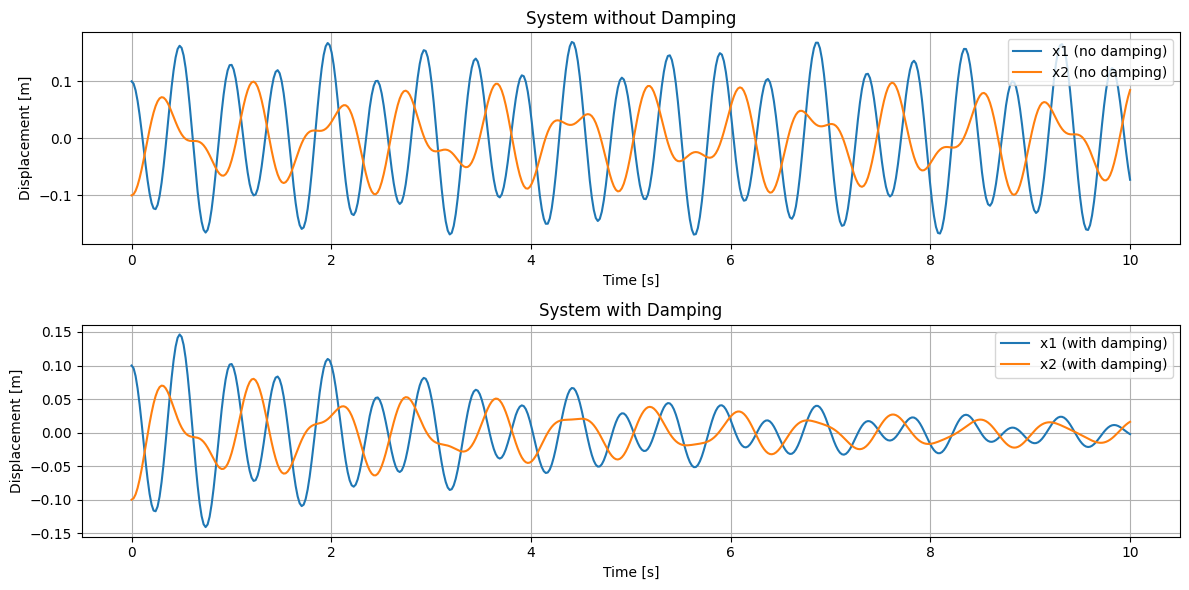

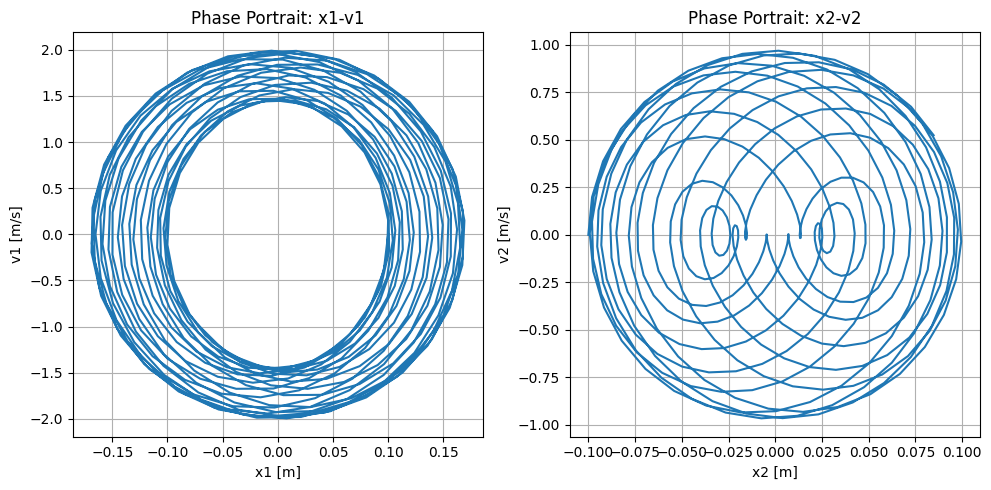

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
m1 = 1
m2 = 2
k1 = 100
k2 = 50
k3 = 100
b = 0 # Damping coefficient (start with no damping)

# State space model
def state_space(t, state, m1, m2, k1, k2, k3, b):
    x1, x2, v1, v2 = state
    dx1dt = v1
    dx2dt = v2
    dv1dt = (-k1 * x1 - k2 * (x1 - x2) - b * v1) / m1
    dv2dt = (-k3 * x2 - k2 * (x2 - x1) - b * v2) / m2
    return [dx1dt, dx2dt, dv1dt, dv2dt]

# Initial conditions
x1_0, x2_0, v1_0, v2_0 = 0.1, -0.1, 0, 0

# Time vector
t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(*t_span, 500)

sol_without_damping = solve_ivp(state_space, t_span, [x1_0, x2_0, v1_0, v2_0], args=(m1, m2, k1, k2, k3, b), t_eval=t_eval)

# Add damping for next simulation
b = 0.5

sol_with_damping = solve_ivp(state_space, t_span, [x1_0, x2_0, v1_0, v2_0], args=(m1, m2, k1, k2, k3, b), t_eval=t_eval)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sol_without_damping.t, sol_without_damping.y[0], label="x1 (no damping)")
plt.plot(sol_without_damping.t, sol_without_damping.y[1], label="x2 (no damping)")
plt.title('System without Damping')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sol_with_damping.t, sol_with_damping.y[0], label="x1 (with damping)")
plt.plot(sol_with_damping.t, sol_with_damping.y[1], label="x2 (with damping)")
plt.title('System with Damping')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Phase portraits for x1-v1 and x2-v2
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sol_without_damping.y[0], sol_without_damping.y[2], label="x1-v1 (no damping)")
plt.title('Phase Portrait: x1-v1')
plt.xlabel('x1 [m]')
plt.ylabel('v1 [m/s]')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol_without_damping.y[1], sol_without_damping.y[3], label="x2-v2 (no damping)")
plt.title('Phase Portrait: x2-v2')
plt.xlabel('x2 [m]')
plt.ylabel('v2 [m/s]')
plt.grid(True)

plt.tight_layout()
plt.show()


### **Cart pole**
![cp](https://drive.google.com/uc?export=view&id=1wxbdRlUzJOcMtF9NVZ53N07i7azMbhi0)

> **Tasks**
>
> 1. Write the equation of motion of the system according to Newton's second law of motion or according to Euler Lagrange method
> 2. Bring the system into a state space model
> 3. Simulate the system with following values $l = 1$, $m = 1$, $M = 2$, $F = 0.01$, $\theta_0 = \frac{\pi}{20}$ and $x_0=0$

# Cart Pole Problem

## Equations of Motion

The system consists of a cart of mass $M$ and a pendulum (pole) of mass $m$ and length $l$. The force $F$ is applied to the cart, and the system is affected by gravity $g$.

The equations of motion, derived using Newton's second law or the Euler-Lagrange method, are:

For the cart (horizontal motion):
$$
(M + m) \ddot{x} - m l \ddot{\theta} \cos(\theta) = F
$$

For the pendulum (rotational motion):
$$
l \ddot{\theta} - g \sin(\theta) + \ddot{x} \cos(\theta) = 0
$$

where:
- $\theta$ is the angle of the pendulum from the vertical,
- $\ddot{x}$ is the acceleration of the cart,
- $\ddot{\theta}$ is the angular acceleration of the pendulum,
- $F$ is the force applied to the cart,
- $M$ is the mass of the cart,
- $m$ is the mass of the pendulum,
- $l$ is the length of the pendulum,
- $g$ is the gravitational acceleration.

Rearranging the equations, we get:
$$
\ddot{\theta} = \frac{g \sin(\theta) - \ddot{x} \cos(\theta)}{l}
$$

Substitute this into the cart equation:
$$
(M + m) \ddot{x} + m \frac{g \sin(\theta) - \ddot{x} \cos(\theta)}{l} \cos(\theta) = F
$$

This gives the coupled equations for the cart and the pendulum motion.

## State Space Representation

To bring the system into a state-space model, define the state variables as:

$$
x_1 = x, \quad x_2 = \dot{x}, \quad x_3 = \theta, \quad x_4 = \dot{\theta}
$$

The state-space model becomes:

$$
\dot{x}_1 = x_2
$$
$$
\dot{x}_2 = \frac{F + m \sin(x_3) (l x_4^2 + g \cos(x_3))}{M + m \sin^2(x_3)}
$$
$$
\dot{x}_3 = x_4
$$
$$
\dot{x}_4 = \frac{-F \cos(x_3) - m l x_4^2 \cos(x_3) \sin(x_3) - (M + m) g \sin(x_3)}{l \left(M + m \sin^2(x_3)\right)}
$$

## Parameters for Simulation

The simulation uses the following parameters:
- $l = 1$ (pendulum length),
- $m = 1$ (pendulum mass),
- $M = 2$ (cart mass),
- $F = 0.01$ (applied force),
- Initial angle $\theta_0 = \frac{\pi}{20}$,
- Initial position $x_0 = 0$.

The system behavior is governed by these parameters.


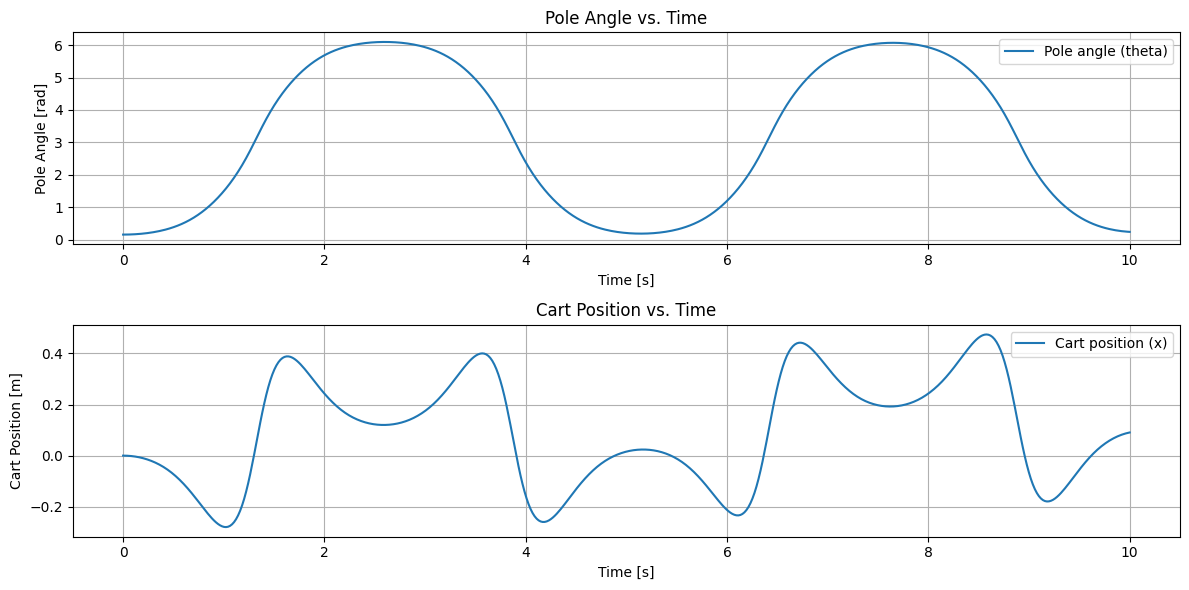

In [ ]:
# Constants for the Cart Pole system
l = 1
m = 1
M = 2
F = 0.01
g = 9.81

def cart_pole_state_space(t, state, l, m, M, F, g):
    x, theta, v, omega = state
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)

    omega_dot = (g * sin_theta + cos_theta * ((-F - m * l * omega**2 * sin_theta) / (M + m))) / \
                (l * (4/3 - (m * cos_theta**2) / (M + m)))
    v_dot = (F + m * l * (omega**2 * sin_theta - omega_dot * cos_theta)) / (M + m)

    return [v, omega, v_dot, omega_dot]

x0, theta0, v0, omega0 = 0, np.pi / 20, 0, 0
initial_conditions = [x0, theta0, v0, omega0]

t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(*t_span, 500)

sol_cart_pole = solve_ivp(cart_pole_state_space, t_span, initial_conditions, args=(l, m, M, F, g), t_eval=t_eval)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sol_cart_pole.t, sol_cart_pole.y[1], label="Pole angle (theta)")
plt.title('Pole Angle vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Pole Angle [rad]')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sol_cart_pole.t, sol_cart_pole.y[0], label="Cart position (x)")
plt.title('Cart Position vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Cart Position [m]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### **Planar Quadrotor**
![pq](https://drive.google.com/uc?export=view&id=1jdfD5DAcysgKl5PGmjuv4ZRdf3COGe_D)

> **Tasks**
>
> 1. Write the equation of motion of the system according to Newton's second law of motion or according to Euler Lagrange method
> 2. Bring the system into a state space model
> 3. Simulate the system with following values $m = 0.1$, $u_1 = 1$, $u_2 = 2$, $g = 9.8$, $\theta_0 = \frac{\pi}{30}$, $x_0=0$ and $y_0=0$

# Planar Quadrotor Problem

## Equations of Motion

The planar quadrotor system consists of a rigid body with mass $m$ and moment of inertia $I$, acted upon by two control forces $u_1$ and $u_2$ (representing the thrust from the two rotors) at a distance $l$ from the center of mass. The system moves in the plane under the influence of gravity $g$ and thrust forces.

The equations of motion, derived using Newton's second law or the Euler-Lagrange method, are:

For the horizontal motion (along the $x$-axis):
$$
m \ddot{x} = -(u_1 + u_2) \sin(\theta)
$$

For the vertical motion (along the $y$-axis):
$$
m \ddot{y} = (u_1 + u_2) \cos(\theta) - mg
$$

For the rotational motion (around the center of mass):
$$
I \ddot{\theta} = l (u_2 - u_1)
$$

where:
- $x$ and $y$ are the horizontal and vertical positions of the quadrotor,
- $\theta$ is the pitch angle of the quadrotor,
- $u_1$ and $u_2$ are the control thrusts from the two rotors,
- $m$ is the mass of the quadrotor,
- $g$ is the gravitational constant,
- $I$ is the moment of inertia of the quadrotor,
- $l$ is the distance from the center of mass to the rotors.

## State Space Representation

To bring the system into a state-space model, define the state variables as:

$$
x_1 = x, \quad x_2 = \dot{x}, \quad x_3 = y, \quad x_4 = \dot{y}, \quad x_5 = \theta, \quad x_6 = \dot{\theta}
$$

The state-space model becomes:

$$
\dot{x}_1 = x_2
$$
$$
\dot{x}_2 = \frac{-(u_1 + u_2) \sin(x_5)}{m}
$$
$$
\dot{x}_3 = x_4
$$
$$
\dot{x}_4 = \frac{(u_1 + u_2) \cos(x_5)}{m} - g
$$
$$
\dot{x}_5 = x_6
$$
$$
\dot{x}_6 = \frac{l (u_2 - u_1)}{I}
$$

## Parameters for Simulation

The simulation uses the following parameters:
- $m = 0.1$,
- $u_1 = 1$ (thrust forces),
- $g = 9.8$,
- $\theta_0 = \frac{\pi}{30}$ (initial pitch angle),
- $x_0 = 0$ and $y_0 = 0$ (initial position).

This state-space model describes the planar motion of the quadrotor under the influence of control inputs $u_1$ and $u_2$.


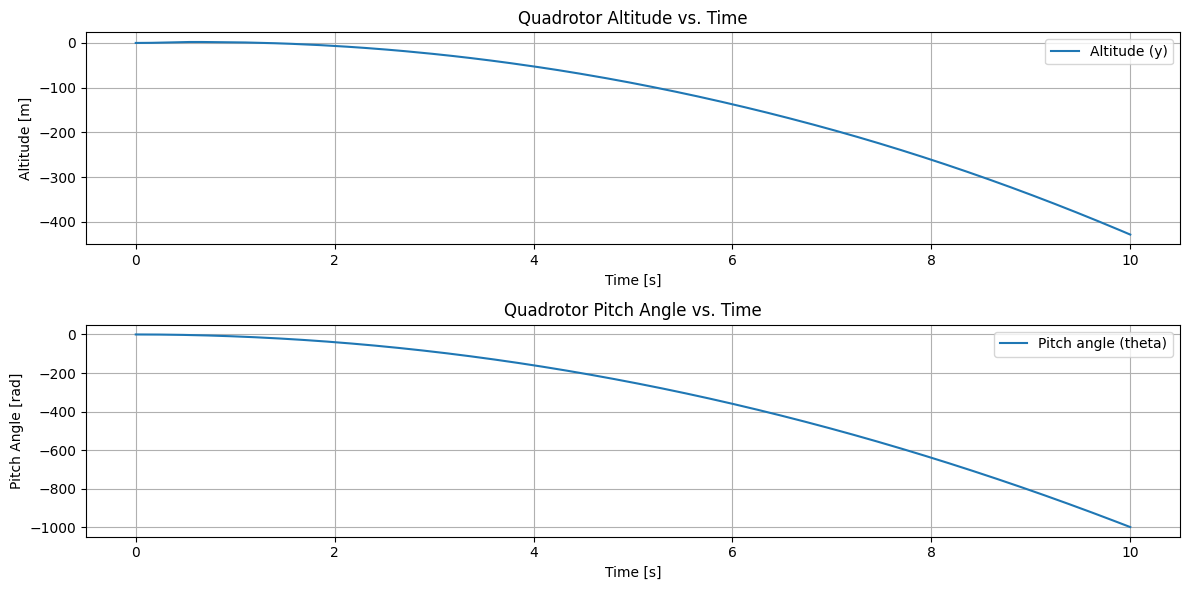

In [ ]:
# Constants for the Planar Quadrotor system
m = 0.1
g = 9.8
l = 0.2  # Distance from the center to rotor
I = 0.01  # Moment of inertia
u1 = 1  # Thrust of rotor 1
u2 = 2  # Thrust of rotor 2

def quadrotor_state_space(t, state, m, g, l, I, u1, u2):
    x, y, theta, v_x, v_y, omega = state

    # Equations of motion
    v_x_dot = (u1 + u2) / m * np.sin(theta)
    v_y_dot = (u1 + u2) / m * np.cos(theta) - g
    omega_dot = l * (u1 - u2) / I

    return [v_x, v_y, omega, v_x_dot, v_y_dot, omega_dot]

x0, y0, theta0, v_x0, v_y0, omega0 = 0, 0, np.pi / 30, 0, 0, 0
initial_conditions_quadrotor = [x0, y0, theta0, v_x0, v_y0, omega0]

t_span_quadrotor = (0, 10)  # 10 seconds
t_eval_quadrotor = np.linspace(*t_span_quadrotor, 500)

sol_quadrotor = solve_ivp(quadrotor_state_space, t_span_quadrotor, initial_conditions_quadrotor, args=(m, g, l, I, u1, u2), t_eval=t_eval_quadrotor)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sol_quadrotor.t, sol_quadrotor.y[1], label="Altitude (y)")
plt.title('Quadrotor Altitude vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Altitude [m]')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sol_quadrotor.t, sol_quadrotor.y[2], label="Pitch angle (theta)")
plt.title('Quadrotor Pitch Angle vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Pitch Angle [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
